In [1]:
import pandas as pd
results = pd.read_csv('allResults.csv')

بهترین تیم تاریخ

In [2]:
results[results["winner"] != "tied"]["winner"].value_counts().sort_values(ascending=False)[0:10]

winner
Brazil         672
England        615
Argentina      591
Germany        591
South Korea    543
Sweden         536
Mexico         505
Italy          468
France         465
Hungary        465
Name: count, dtype: int64

بهترین تیم هر سال

In [3]:
results['date'] = pd.to_datetime(results['date'])

In [4]:
results["year"] = pd.DatetimeIndex(results["date"]).year

In [5]:
results[(results["year"] == 2024) & (results["winner"] != "tied")]["winner"].value_counts().sort_values(ascending=False)[0:1]

winner
Iran    12
Name: count, dtype: int64

In [6]:
years = results["year"].unique()
years

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 20

In [7]:
mvp = []
temp = results[results["winner"] != "tied"]
for i in years:
    list = temp[temp["year"] == i]["winner"].value_counts().sort_values(ascending=False)
    if(len(list) > 0):
        mvp.append(list.keys()[0])
    else:
        mvp.append("None")
mvp

['None',
 'England',
 'Scotland',
 'None',
 'Scotland',
 'Scotland',
 'Scotland',
 'England',
 'Scotland',
 'Scotland',
 'Wales',
 'England',
 'Scotland',
 'Scotland',
 'England',
 'Scotland',
 'England',
 'England',
 'England',
 'England',
 'England',
 'England',
 'Scotland',
 'England',
 'England',
 'England',
 'England',
 'England',
 'Scotland',
 'England',
 'Scotland',
 'England',
 'England',
 'England',
 'Belgium',
 'Wales',
 'England',
 'England',
 'Argentina',
 'Hungary',
 'Hungary',
 'Belgium',
 'Sweden',
 'Denmark',
 'Argentina',
 'Uruguay',
 'Hungary',
 'Argentina',
 'Switzerland',
 'Scotland',
 'Uruguay',
 'Argentina',
 'Sweden',
 'Austria',
 'Austria',
 'Czechoslovakia',
 'Italy',
 'Sweden',
 'Cuba',
 'Austria',
 'Austria',
 'Italy',
 'Germany',
 'Germany',
 'Hungary',
 'Germany',
 'Italy',
 'Germany',
 'Argentina',
 'Argentina',
 'Germany',
 'Hungary',
 'Trinidad and Tobago',
 'Argentina',
 'Costa Rica',
 'South Africa',
 'Hungary',
 'Brazil',
 'Yugoslavia',
 'Scotland',
 

In [8]:
mvpOverTime = pd.DataFrame({"year": years , "team": mvp})
mvpOverTime.head()

,year,team
0,1872,None
1,1873,England
2,1874,Scotland
3,1875,None
4,1876,Scotland


درصد پیروزی تیم میزبان

In [9]:
a = results[(results["winner"] == results["home_team"]) & (results["neutral"] == False)].shape[0]

In [10]:
homePercentage = (a / results.shape[0]) * 100
print(homePercentage)

37.587713769486115


کدوم تیم‌ها بیشتر مقابل هم بازی کرده‌اند؟

In [11]:
df = results[["home_team" , "away_team"]]

In [12]:
matches = []
df["vs"] = "0"
for ixd , row in df.iterrows():
    con1 = row["home_team"] + "-" + row["away_team"]
    con2 = row["away_team"] + "-" + row["home_team"]
    if con1 in matches or con2 in matches:
        if con1 in matches:
            df.iloc[ixd , df.columns.get_loc("vs")] = con1
        else:
            df.iloc[ixd , df.columns.get_loc("vs")] = con2
    else:
        df.iloc[ixd , df.columns.get_loc("vs")] = con1
        matches.append(con1)

C:\Users\amitis\AppData\Local\Temp\ipykernel_2504\1161736792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vs"] = "0"


In [13]:
df.head(10)

,home_team,away_team,vs
0,Scotland,England,Scotland-England
1,England,Scotland,Scotland-England
2,Scotland,England,Scotland-England
3,England,Scotland,Scotland-England
4,Scotland,England,Scotland-England
5,Scotland,Wales,Scotland-Wales
6,England,Scotland,Scotland-England
7,Wales,Scotland,Scotland-Wales
8,Scotland,England,Scotland-England
9,Scotland,Wales,Scotland-Wales


In [14]:
df["vs"].value_counts().sort_values(ascending=False)[0:10]

vs
Uruguay-Argentina      182
Austria-Hungary        137
Belgium-Netherlands    128
Jersey-Guernsey        119
Scotland-England       118
Kenya-Uganda           110
Argentina-Brazil       109
Sweden-Norway          109
Denmark-Sweden         108
Scotland-Wales         106
Name: count, dtype: int64

کدوم کشور بیشتر میزبان بازی‌های بیطرف بوده؟

In [20]:
results[results["neutral"] == True]["country"].value_counts().sort_values(ascending=False)[0:10]

country
United States           960
Malaysia                508
Qatar                   426
France                  401
Thailand                360
South Africa            349
United Arab Emirates    341
England                 231
Germany                 219
Brazil                  214
Name: count, dtype: int64

کدوم تیم بیشترین بازی دوستانه را داشته و این چه تاثیری روی عملکرد اون تیم داشته؟

In [22]:
results[results["tournament"] == "Friendly"]["home_team"].value_counts().sort_values(ascending=False)[0:10]

home_team
Mexico         316
Germany        307
France         301
Hungary        285
Sweden         261
Austria        260
Poland         252
Belgium        250
Netherlands    250
Switzerland    248
Name: count, dtype: int64

<Axes: xlabel='year'>

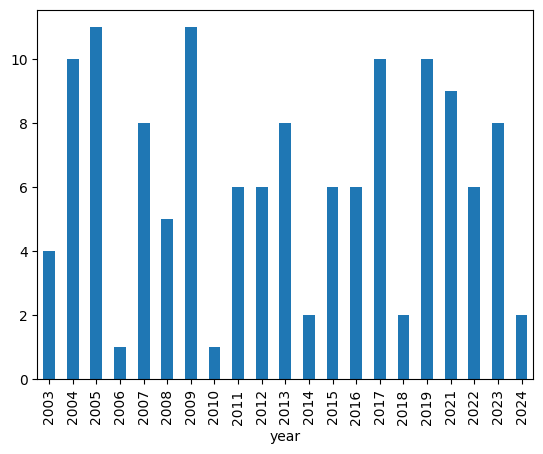

In [17]:
results[(results["winner"] == "Mexico") & (results["tournament"] != "Friendly")]["year"].value_counts().sort_index()[-21:].plot.bar()